<a href="https://colab.research.google.com/github/ArmaanSethi/NanoGPT/blob/main/NanoGPT_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [3]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-04-08 00:13:25--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2024-04-08 00:13:25 (20.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [5]:
with open('input.txt','r', encoding='utf-8') as f:
  text = f.read()

In [6]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [7]:
# print first 1000 chars
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [12]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print('Vocabulary:\n', ''.join(chars))
print('Vocab Size:\n', vocab_size)

Vocabulary:
 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Vocab Size:
 65


In [14]:
stoi = {ch:i for i,ch in enumerate(chars)}
itos = {i:ch for i,ch in enumerate(chars)}
encode  = lambda s: [stoi[c] for c in s]
decode = lambda l: [itos[i] for i in l]

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
['h', 'i', 'i', ' ', 't', 'h', 'e', 'r', 'e']


In [16]:
# entire dataset of text is now encoded sequence of integers
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [21]:
# Split into train and validation sets
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [22]:
# context length or block size.
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [24]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
  context = x[:t+1]
  target = y[t]
  print(f"input {context} target is: {target}")

input tensor([18]) target is: 47
input tensor([18, 47]) target is: 56
input tensor([18, 47, 56]) target is: 57
input tensor([18, 47, 56, 57]) target is: 58
input tensor([18, 47, 56, 57, 58]) target is: 1
input tensor([18, 47, 56, 57, 58,  1]) target is: 15
input tensor([18, 47, 56, 57, 58,  1, 15]) target is: 47
input tensor([18, 47, 56, 57, 58,  1, 15, 47]) target is: 58


In [27]:
torch.manual_seed(1337)
batch_size = 4
block_size = 8

# generate a small batch of data of inputs x and targets y
def get_batch(split):
  data = train_data if split == 'train' else val_data
  ix = torch.randint(len(data) - block_size, (batch_size,))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  return x,y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('---')

for b in range(batch_size): #batch dim
  for t in range(block_size): # time dim
    context = xb[b, :t+1]
    target = yb[b, t]
    print(f"input {context.tolist()} target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
---
input [24] target: 43
input [24, 43] target: 58
input [24, 43, 58] target: 5
input [24, 43, 58, 5] target: 57
input [24, 43, 58, 5, 57] target: 1
input [24, 43, 58, 5, 57, 1] target: 46
input [24, 43, 58, 5, 57, 1, 46] target: 43
input [24, 43, 58, 5, 57, 1, 46, 43] target: 39
input [44] target: 53
input [44, 53] target: 56
input [44, 53, 56] target: 1
input [44, 53, 56, 1] target: 58
input [44, 53, 56, 1, 58] target: 46
input [44, 53, 56, 1, 58, 46] target: 39
input [44, 53, 56, 1, 58, 46, 39] target: 58
input [44, 53, 56, 1, 58, 46, 39, 58] target: 1
input [52] target: 58
input [52, 58] target:

In [28]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

In [45]:
# No context. Tokens just know their value and nothing else.
class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()
    # each token directly reads off the logits for the  next token from a lookup table
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets=None):
    # idx and targets are both (B,T) tensor of integers. logits predict next token.
    logits = self.token_embedding_table(idx) # (Batch,Time,Channel):4x8x65
    if targets is None:
      loss = None
    else:
      B,T,C = logits.shape
      logits = logits.view(B*T,C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits,targets) #negative log liklihood.

    return logits,loss

  def generate(self, idx,  max_new_tokens):
    # idx is (B,T) array of indices in the current context
    for _ in range(max_new_tokens):
      #get predictions
      logits,loss = self(idx)
      # focus only on the last time step (later history will be used)
      logits = logits[:,-1,:] # becomes (B,C)
      # apply softmax to get probabilities
      probs = F.softmax(logits, dim=-1) # (B,C)
      # sample from the distribution
      idx_next = torch.multinomial(probs,num_samples=1) # (B,1)
      # append sampled index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B,T+1)
    return idx


m = BigramLanguageModel(vocab_size)
logits,loss = m(xb, yb)
# The scores for what comes next for all characters
print(logits.shape)
print(loss)

# idx = torch.zeros((1,1), dtype = torch.long)

print(decode(m.generate(idx = torch.zeros((1,1), dtype = torch.long), max_new_tokens=100)[0].tolist()))

torch.Size([32, 65])
tensor(4.6326, grad_fn=<NllLossBackward0>)
['\n', 'g', '\n', 'I', 'l', 'v', '-', '-', 'U', 'Q', 'T', 'r', 'h', '!', 'm', 'z', '$', 'M', 'g', 'y', 'W', 'P', 'x', 'W', 'u', 'C', 'F', '-', 'y', 'r', '-', 'K', 'P', ';', 'n', 'i', 'b', '&', ',', "'", 'E', 'Z', 'r', "'", '&', 'i', 'K', 'v', 'S', 'r', '3', "'", '&', 'F', 'Q', 'w', 'p', 'k', 'M', 'j', 'b', 'q', '3', 'G', 'M', 'V', '?', 'b', 'L', 'I', 'C', 't', 'r', "'", 'E', 'q', 'b', 'g', 'x', 'a', 'd', 'n', 'F', "'", 'E', 'F', 'd', 'O', 'm', 'F', 'g', 'h', 'r', 'C', 'w', 'y', 'b', 'I', 'B', '\n', 'm']


In [47]:
# create Pytorch Optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr = 1e-3)

In [61]:
batch_size = 32
for steps in range(10000):
  #sample a batch of data
  xb,yb = get_batch('train')

  #evaluate loss
  logits, loss = m(xb,yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()


print(loss.item())

2.352534770965576


In [62]:
# print(decode(m.generate(idx = torch.zeros((1,1), dtype = torch.long), max_new_tokens=100)[0].tolist()))
''.join(decode(m.generate(idx = torch.zeros((1,1), dtype = torch.long), max_new_tokens=100)[0].tolist()))

'\n\nUMury coue wenithegoinoar t she ICI cenave o ou t it aces wne oms,\nWhefo thres; thatefewins trey pa'

In [63]:
# FINISH BIGRAM

In [64]:
# STARTING TRANSFORMER!!!

# The mathematical trick in self-attention ✈

---





In [94]:
# consider the following toy example:

torch.manual_seed(1337)
B,T,C = 4,8,2
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [108]:
# We want x[b,t] = mean_{x<=t} x[b,i]
# V1
xbow = torch.zeros((B,T,C))
for b in range(B):
  for t in range(T):
    xprev = x[b,:t+1] # (t,C)
    xbow[b,t] = torch.mean(xprev,0)


In [109]:
# V2: matmul
wei = torch.tril(torch.ones(T,T))
wei = wei / wei.sum(1, keepdim=True)
print(wei.shape)
print(x.shape)
xbow2 = wei @ x # (T, T) @ (B, T, C) --> (B, T, T) @ (B, T, C) --> (B, T, C)
print(xbow.shape)
print(xbow2.shape)
torch.allclose(xbow, xbow2, rtol=0.001)

torch.Size([8, 8])
torch.Size([4, 8, 2])
torch.Size([4, 8, 2])
torch.Size([4, 8, 2])


True

In [110]:
xbow2[0] - xbow[0]

tensor([[ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -2.9802e-08],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.4506e-09],
        [ 7.4506e-09,  0.0000e+00],
        [-7.4506e-09,  1.4901e-08],
        [ 0.0000e+00,  0.0000e+00]])

In [111]:
xbow2

tensor([[[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]],

        [[ 1.3488, -0.1396],
         [ 0.8173,  0.4127],
         [-0.1342,  0.4395],
         [ 0.2711,  0.4774],
         [ 0.2421,  0.0694],
         [ 0.0084,  0.0020],
         [ 0.0712, -0.1128],
         [ 0.2527,  0.2149]],

        [[-0.6631, -0.2513],
         [ 0.1735, -0.0649],
         [ 0.1685,  0.3348],
         [-0.1621,  0.1765],
         [-0.2312, -0.0436],
         [-0.1015, -0.2855],
         [-0.2593, -0.1630],
         [-0.3015, -0.2293]],

        [[ 1.6455, -0.8030],
         [ 1.4985, -0.5395],
         [ 0.4954,  0.3420],
         [ 1.0623, -0.1802],
         [ 1.1401, -0.4462],
         [ 1.0870, -0.4071],
         [ 1.0430, -0.1299],
         [ 1.1138, -0.1641]]])

In [112]:
x[0]

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])

In [113]:
xbow[0]

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

In [114]:
torch.manual_seed(42)
a = torch.tril(torch.ones(3,3))
b = torch.randint(0,10,(3,2)).float()
c = a@b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)
print('--')

a=
tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[ 2.,  7.],
        [ 8., 11.],
        [14., 16.]])
--


In [117]:
tril = torch.tril(torch.ones(T,T))

In [125]:
# Version 3: Softmax version
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf')) #Future can only depend on the past.
wei = F.softmax(wei,dim=1)
print(wei)
xbow3 = wei @ x
torch.allclose(xbow,xbow3, rtol=0.001)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])


True

In [162]:
# Version 4: Self Attention! :)

torch.manual_seed(1337)
B,T,C = 4,8,32
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x) # (B,T,16)
q = query(x) # (B,T,16)
wei = q @ k.transpose(-2,-1) # (B,T,16) @ (T,16,T) --> (B,T,T)

# Mask so that the future cannot effect the prediction
tril = torch.tril(torch.ones((T,T)))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei,dim=-1)

v = value(x)
out = wei @ x

out.shape

torch.Size([4, 8, 32])

In [163]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

In [164]:
import matplotlib.pyplot as plt

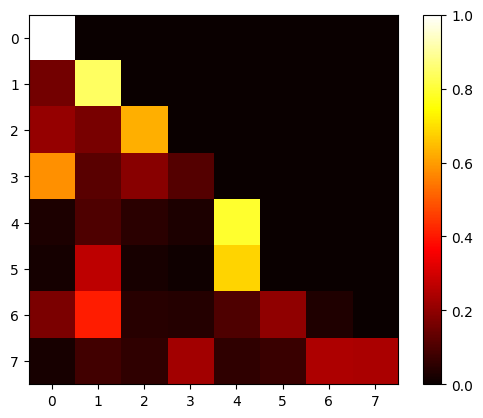

In [165]:
plt.imshow(wei[0].detach().numpy(), cmap = 'hot')
plt.colorbar()
plt.show()

Notes:


*   Attention is a communication mechanism. Can be seen as nodes in a directed graph looking at each other and aggregation of information.
*   There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
*   Each example across batch dimension is of course processed completely independantly and never "talk" to each other
*   In an "encoder" attention block just delete the single line of code that does masking with `tril` , allowing all tokens to communicate. Here this is a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings like language modelling. (future never talks to the past)
*   "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source(e.g. an encoder module)
*   "Scaled" attention additionally divides `wei` by $\frac{1}{\sqrt{\text{head_size}}}$, This it so when input Q,K are unit variance, wei will be unit variance and Softmax will stay diffused and not saturate too much. (normalize so dot products don't get too big to help softmax)





